# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### Soluzioni analitiche

##### Ho modificato l'intervallo di temperatura delle soluzioni analitiche per confrontarle con le simulazioni

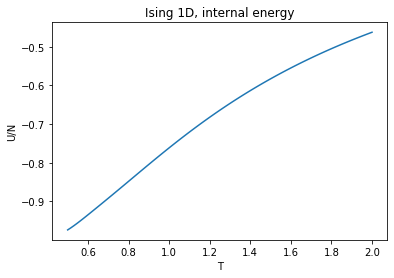

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

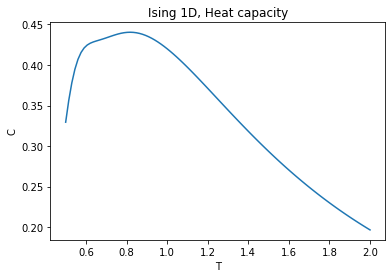

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

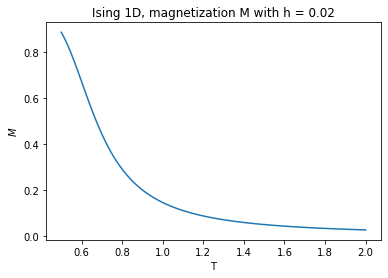

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

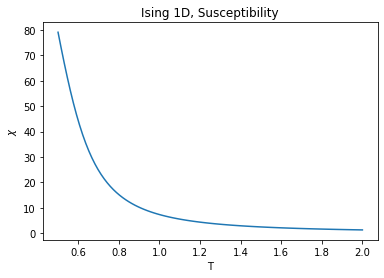

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

#### Codice

Ho completato il codice con le seguenti modifiche:

- ho inserito le parte relativa al calcolo di tutte le variabili in esame e delle loro medie a blocchi.

- ho inserito nella funzione input() la possibilità di ripartire da una configurazione precedente salvata in un file config.old, se presente nella stessa directory.

- ho implementato i due metodi di sampling richiesti dall'esercizio

- ho sviluppato il main in modo da eseguire le simulazioni, partendo dalla temperatura fornita nel file di input, aumentandola di volta in volta di 0.05, in modo da coprire l'intervallo richiesto nell'esercizio, salvando il risultato finale della media a blocchi con il relativo errore per ogni temperatura utilizzata.

- prima di lanciare la presa dati per ogni temperatura, ho lanciato delle brevi simulazioni per determinare il numero di mosse necessarie a raggiungere l'equilibrio, quindi ho inserito nel main una parte di codice per riequilibrare il sistema dopo aver aumentato la temperatura, prima di ripartire con la presa dati. La prima presa dati, a temperatura 0.5 (fornita da input), è stata eseguita equilibrando il sistema precedentemente e leggendo la configurazione col metodo di restart.

- ho eseguito un totale di 4 simulazioni, con 10000 step per blocco e 200 blocchi, per un totale di due milioni di step: 2 simulazioni per entrambi i metodi di sampling, una con campo esterno nullo ed una con campo esterno h = 0.02 per misurare la magnetizzazione.

- il numero di step necessari a raggiungere l'equilibrio è di circa 40000, quindi ho impostato la parte di codice di "riequilibrazione" in modo da eseguire 50000 mosse senza prendere misure.

#### Risultati

Qui riporto i grafici riguardanti l'equilibrazione (ometto la magnetizzazione poichè riporto l'andamento a campo nullo); per cercare il tempo, in numero di step, necessario al raggiungimento dell'equilibrio del sistema ho eseguito simulazioni da 100 blocchi da 1000 step per blocco. L'equilibrio è raggiunto dopo circa 20 blocchi, cioè 20000 step. Durante la presa dati, la fase di riequilibrazione consiste in 50000 step, in modo da essere sicuri di aver riequilibrato il sistema

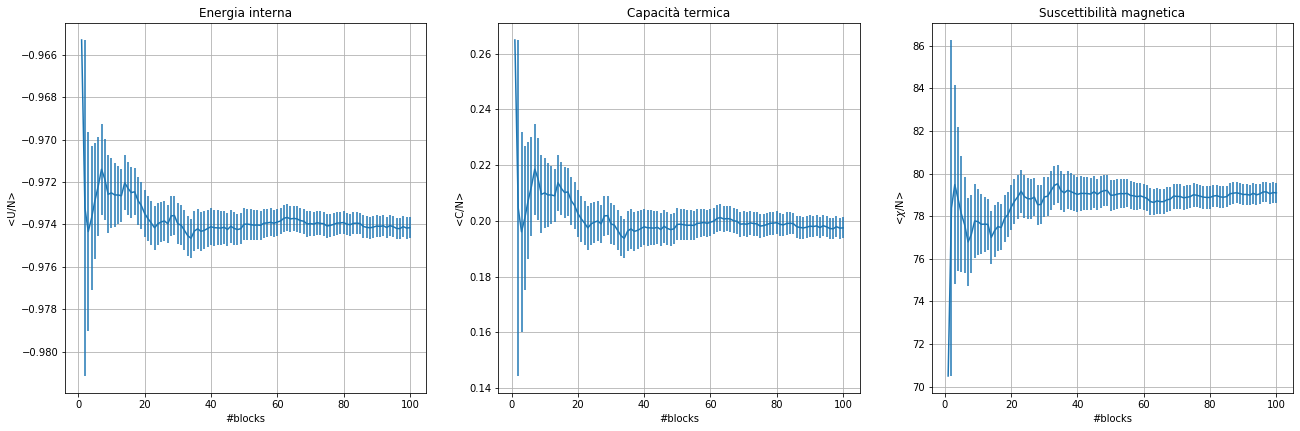

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

ene_equi = np.loadtxt("Equilibrazione/output.ene.0").T
heat_equi = np.loadtxt("Equilibrazione/output.heat.0").T
chi_equi = np.loadtxt("Equilibrazione/output.chi.0").T

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(ene_equi[0],ene_equi[2],yerr=ene_equi[3])
plt.title("Energia interna")
plt.xlabel('#blocks')
plt.ylabel('<U/N>')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(heat_equi[0],heat_equi[2],yerr=heat_equi[3])
plt.title("Capacità termica")
plt.xlabel('#blocks')
plt.ylabel('<C/N>')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(chi_equi[0],chi_equi[2],yerr=chi_equi[3])
plt.title("Suscettibilità magnetica")
plt.xlabel('#blocks')
plt.ylabel('<$\chi$/N>')
plt.grid(True)
plt.show()

Riporto quindi i dati delle simulazioni per le quattro grandezze in esame, per entrambi i metodi di sampling; riporto anche la curva analitica nell'intervallo [0.5,2].

### Per l'energia interna

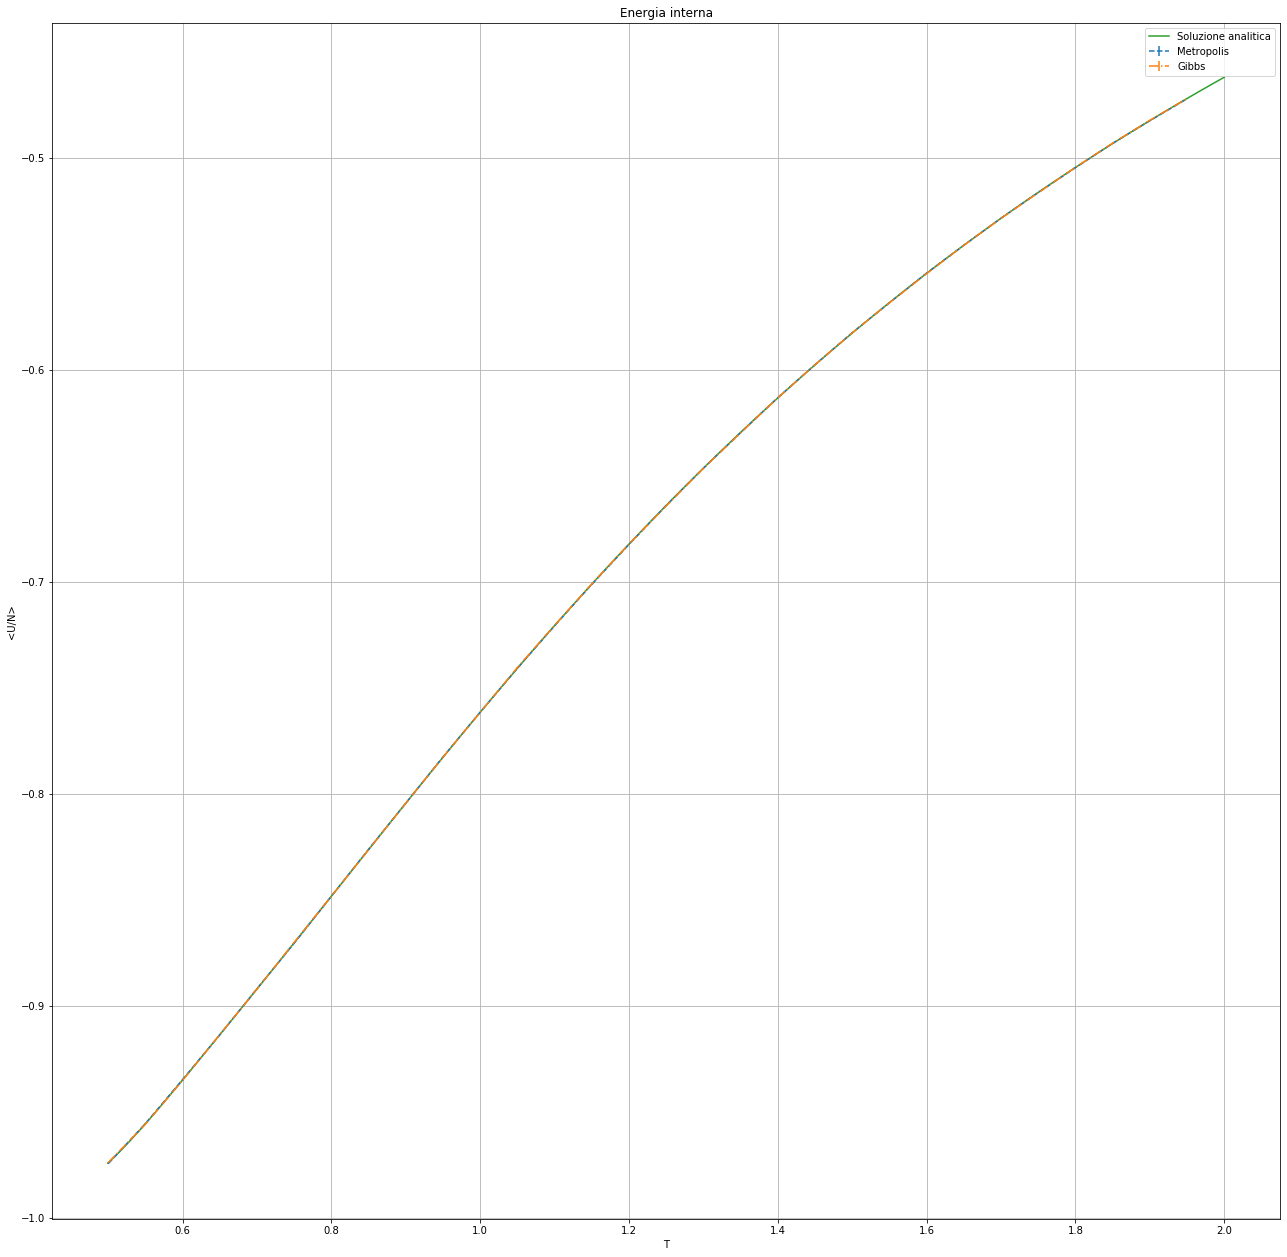

In [6]:
ene_metro = np.loadtxt("Metropolis/Energy.dat").T
ene_gibbs = np.loadtxt("Gibbs/Energy.dat").T

plt.figure(figsize=[22,22])
plt.subplot(1,1,1)
plt.errorbar(ene_metro[0],ene_metro[1],yerr=ene_metro[2], label = 'Metropolis', linestyle = '--')
plt.errorbar(ene_gibbs[0],ene_gibbs[1],yerr=ene_gibbs[2], label = 'Gibbs', linestyle = '-.')
plt.plot(T, e, label = 'Soluzione analitica')
plt.title("Energia interna")
plt.xlabel('T')
plt.ylabel('<U/N>')
plt.grid(True)
plt.legend()
plt.show()

### Per la capacità termica

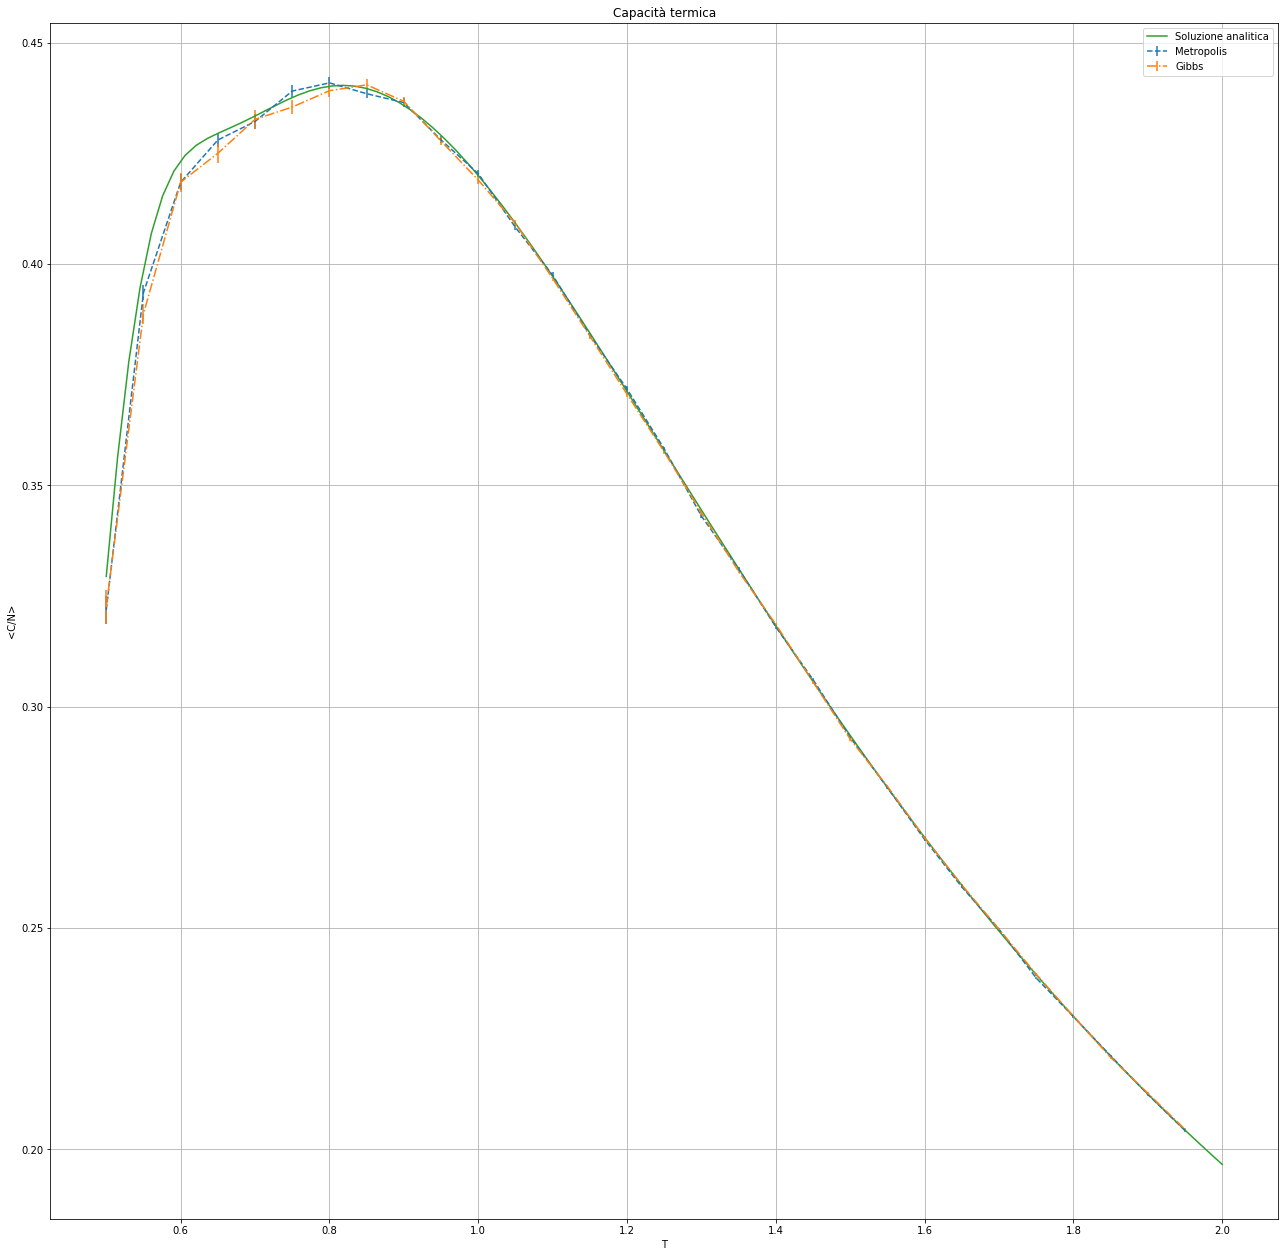

In [12]:
heat_metro = np.loadtxt("Metropolis/Heat_capacity.dat").T
heat_gibbs = np.loadtxt("Gibbs/Heat_capacity.dat").T

plt.figure(figsize=[22,22])
plt.subplot(1,1,1)
plt.errorbar(heat_metro[0],heat_metro[1],yerr=heat_metro[2], label = 'Metropolis', linestyle = '--')
plt.errorbar(heat_gibbs[0],heat_gibbs[1],yerr=heat_gibbs[2], label = 'Gibbs', linestyle = '-.')
plt.plot(T, heat, label = 'Soluzione analitica')
plt.title("Capacità termica")
plt.xlabel('T')
plt.ylabel('<C/N>')
plt.grid(True)
plt.legend()
plt.show()

### Per la suscettibilità magnetica

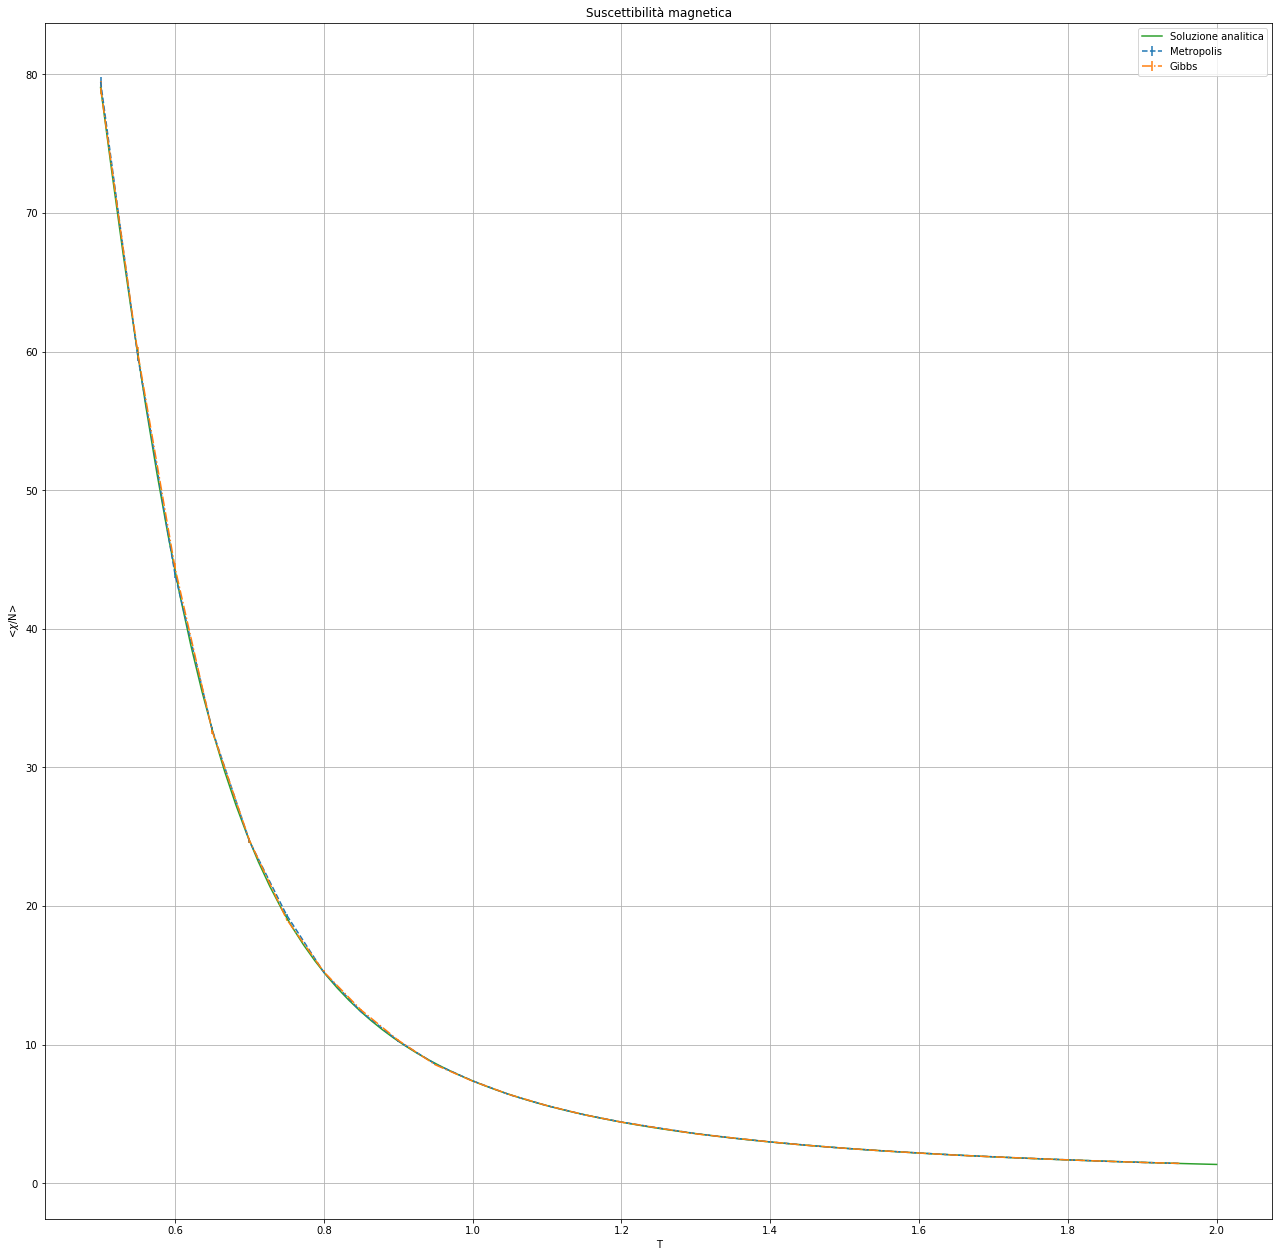

In [8]:
chi_metro = np.loadtxt("Metropolis/Susceptibility.dat").T
chi_gibbs = np.loadtxt("Gibbs/Susceptibility.dat").T

plt.figure(figsize=[22,22])
plt.subplot(1,1,1)
plt.errorbar(chi_metro[0],chi_metro[1],yerr=chi_metro[2], label = 'Metropolis', linestyle = '--')
plt.errorbar(chi_gibbs[0],chi_gibbs[1],yerr=chi_gibbs[2], label = 'Gibbs', linestyle = '-.')
plt.plot(T, X, label = 'Soluzione analitica')
plt.title("Suscettibilità magnetica")
plt.xlabel('T')
plt.ylabel('<$\chi$/N>')
plt.grid(True)
plt.legend()
plt.show()

### Per la magnetizzazione (con campo esterno $\neq$ 0)

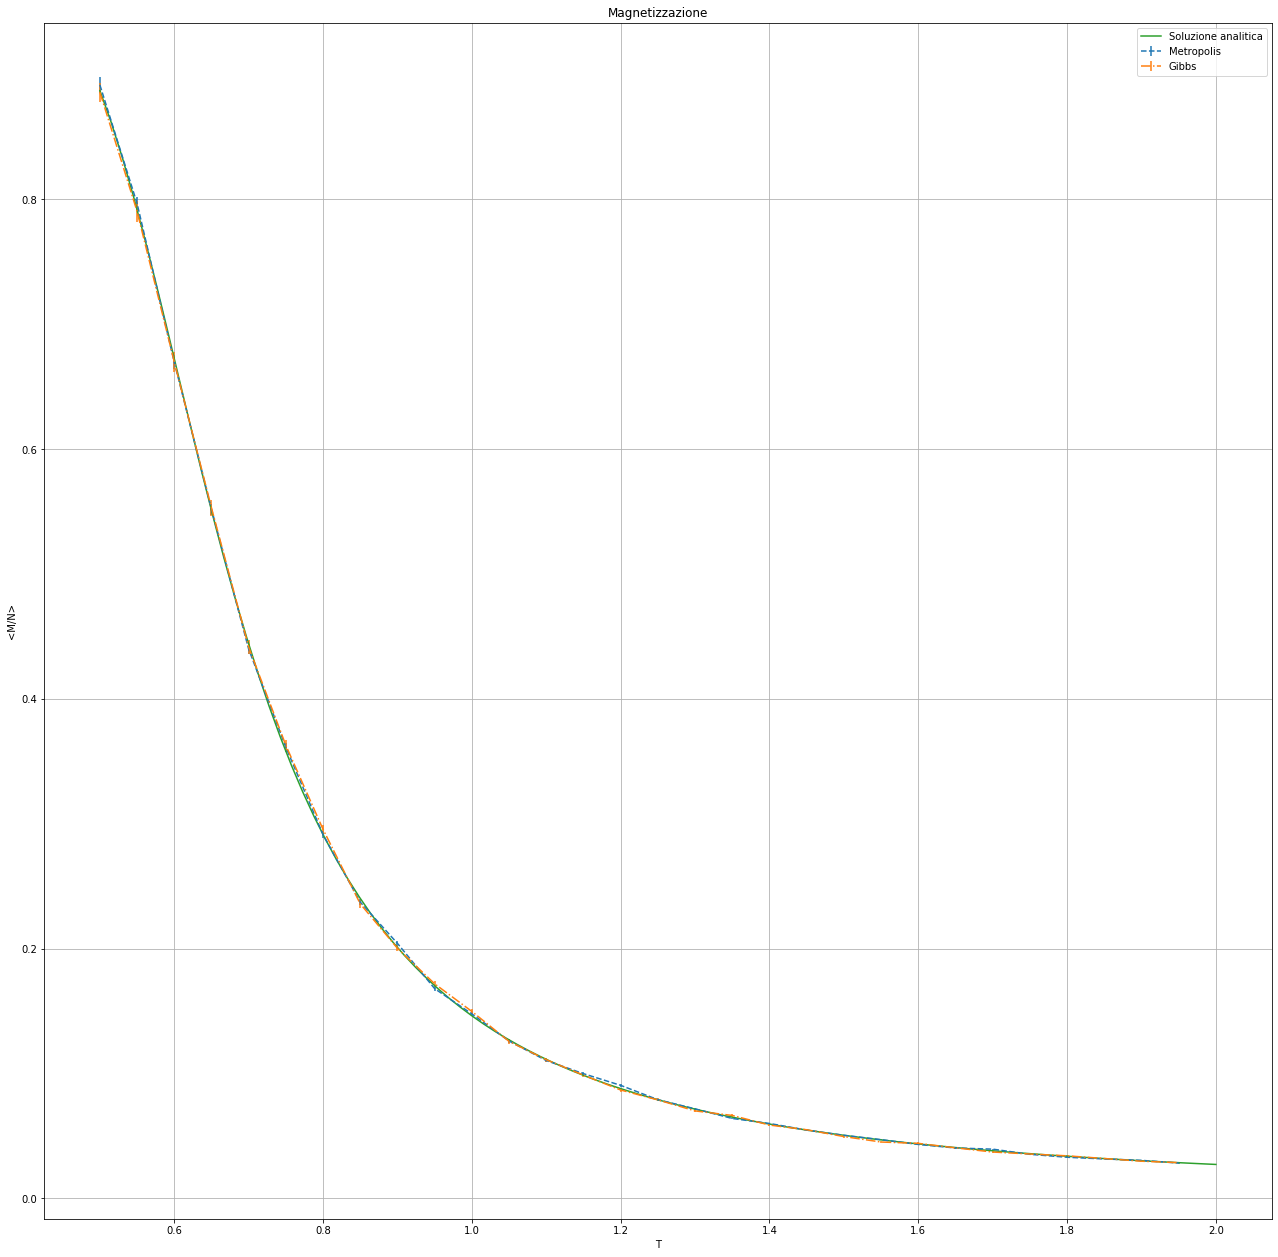

In [9]:
mag_metro = np.loadtxt("Metropolis/Magnetization.dat").T
mag_gibbs = np.loadtxt("Gibbs/Magnetization.dat").T

plt.figure(figsize=[22,22])
plt.subplot(1,1,1)
plt.errorbar(mag_metro[0],mag_metro[1],yerr=mag_metro[2], label = 'Metropolis', linestyle = '--')
plt.errorbar(mag_gibbs[0],mag_gibbs[1],yerr=mag_gibbs[2], label = 'Gibbs', linestyle = '-.')
plt.plot(T, M, label = 'Soluzione analitica')
plt.title("Magnetizzazione")
plt.xlabel('T')
plt.ylabel('<M/N>')
plt.grid(True)
plt.legend()
plt.show()